<a href="https://colab.research.google.com/github/hoseinAkbari97/machine_learning_course/blob/main/Chapter_01_Supervised_Learning/regression/Linear_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Generating and plotting the data

In [3]:
def generate_data(n=50, noise=5.0):
  """This is a function to generate data"""
  np.random.seed(42)
  x = np.linspace(-10, 10, n)
  # The true and desired line is: y = 3x + 8
  true_slope = 3
  true_intercept = 8
  noise = np.random.randn(n) * noise
  y = true_slope * x + true_intercept + noise
  return x, y

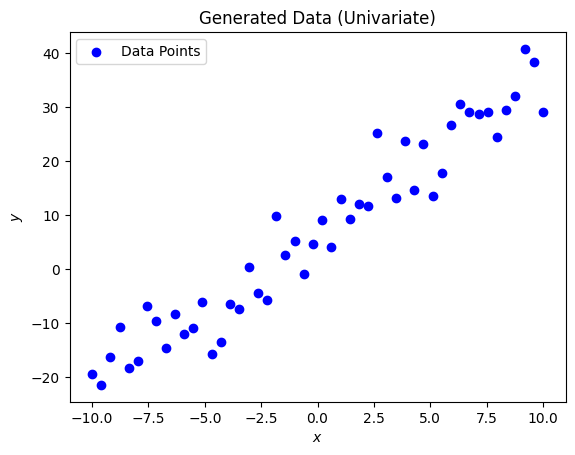

In [4]:
# Generating data and plotting them
X , y = generate_data(n=50, noise=5.0)
plt.scatter(X, y, color='blue', label='Data Points')
plt.title('Generated Data (Univariate)')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

Linear Regression: Analytical Solution

Implement the Closed-Form Solution

In [5]:
# Hypothesis: h_w(x) = w_0 + w_1 * x_1
def h_x(x, w):
  """Equivalent to w_0 + w_1 * x"""
  return w[0] + w[1] * x

def linear_regression_closed_form(x, y):
  """Linear Regression using the closed-form solution
  first step is adding the bias term (x_0 = 1) to input vector x
  This makes x_b as the full input vector with bias term"""
  x_b = np.c_[np.ones((len(x), 1)), x]

  # The closed-form solution is w = (X^T * X)^-1 * X^T * y
  w = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
  return w

# Get parameter vector w
w = linear_regression_closed_form(X, y)
print("Parameter vector (w): ")
print(f"w_1 = {w[1]:.2f}, w_0 = {w[0]:.2f}")



Parameter vector (w): 
w_1 = 2.86, w_0 = 6.87


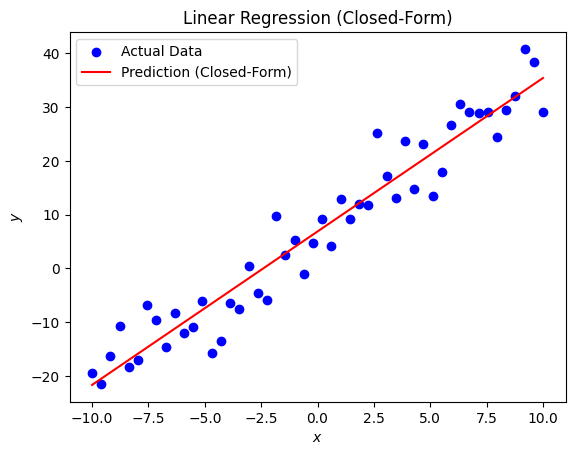

In [6]:
# Plotting the results

y_pred = h_x(X, w)
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Prediction (Closed-Form)')
plt.title('Linear Regression (Closed-Form)')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

# **Polynomial Regression: Analytical Solution**

# Engineering Polynomial Features

In [7]:
def polynomial_features(X, degree):
  """Function to generate polynomial features"""
  X_poly = np.c_[np.ones(len(X))]
  for i in range(1, degree + 1):
    X_poly = np.c_[X_poly, np.power(X, i)]
  return X_poly

# Implement Polynomial Regression

In [8]:
def polynomial_regression(X, y, degree):
  """Polynomial Regression"""
  X_poly = polynomial_features(X, degree)

  # Closed-form solution: w = (X'T * X')^-1 * X'^T * y
  w = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
  return w

# Degree of the polynomial regression
m = 5
# Parameter vector w
w_poly = polynomial_regression(X, y, m)

print(f"Parameters (w) for degree {m}:")
print(w_poly)

Parameters (w) for degree 5:
[ 5.88112811e+00  3.55957762e+00  3.28108945e-02 -2.15493734e-02
 -6.78082560e-05  1.38175494e-04]


# Visualizing the Polynomial Fit

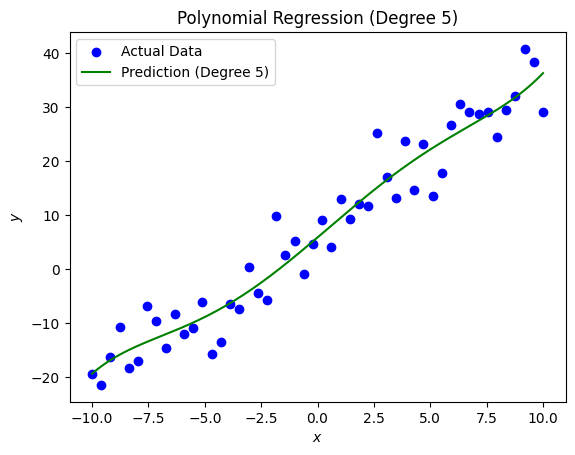

In [9]:
X_fit = np.linspace(X.min(), X.max(), 200)
X_fit_poly = polynomial_features(X_fit, m)
y_poly_pred = X_fit_poly.dot(w_poly)

# Plot the actual data and the polynomial fit
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_fit, y_poly_pred, color='green', label=f'Prediction (Degree {m})')
plt.title(f'Polynomial Regression (Degree {m})')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

# Visualizing E_rms

The Root Mean Square Error (RMSE) helps us understand how well our model fits the data

In [10]:
def compute_rms_error(y_true, y_pred):
  return np.sqrt(np.mean((y_true - y_pred)**2))

# Visualizing RMSE for different Polynomial degrees

We could visualize the E_rms better if we split generated data into train and test datasets:

Degree 0: Train RMSE = 17.58, Test RMSE = 16.98


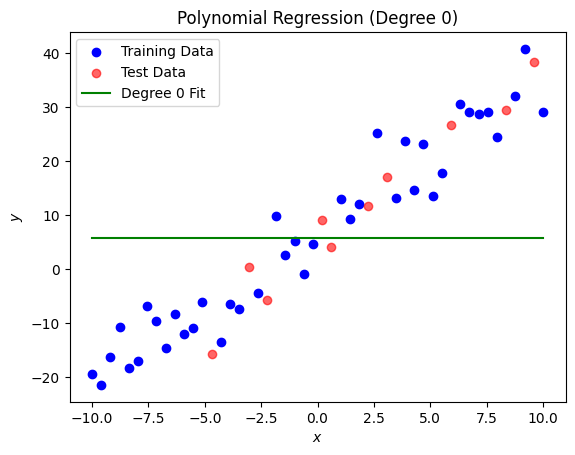

Degree 1: Train RMSE = 4.58, Test RMSE = 4.49


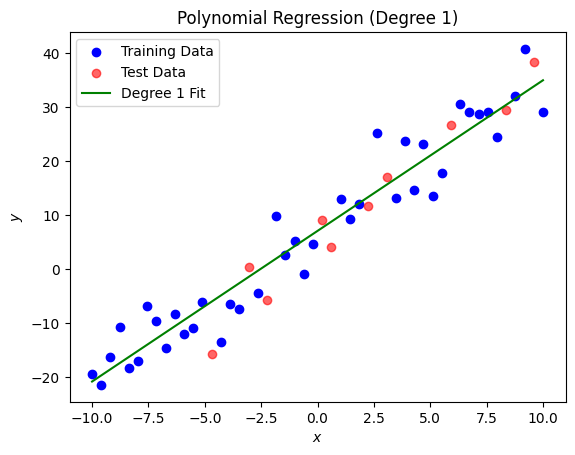

Degree 2: Train RMSE = 4.55, Test RMSE = 4.24


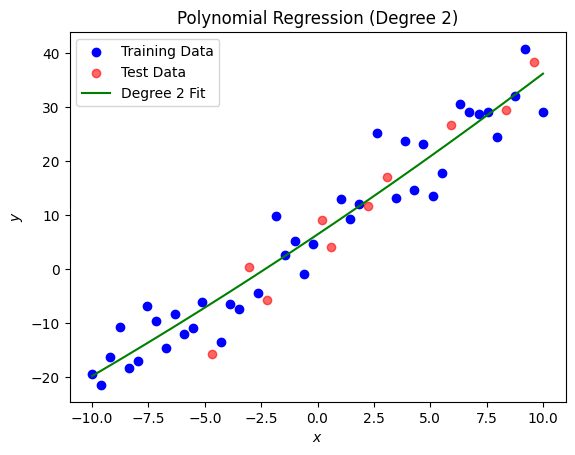

Degree 3: Train RMSE = 4.47, Test RMSE = 4.12


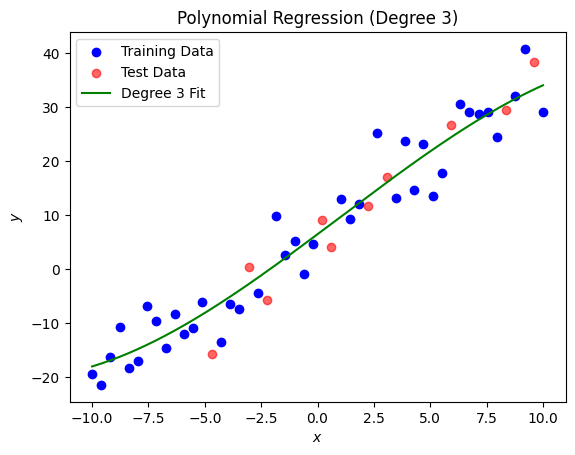

Degree 4: Train RMSE = 4.47, Test RMSE = 4.14


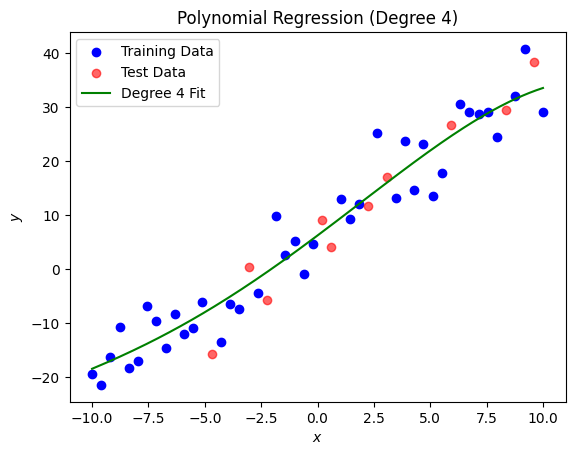

Degree 5: Train RMSE = 4.44, Test RMSE = 4.03


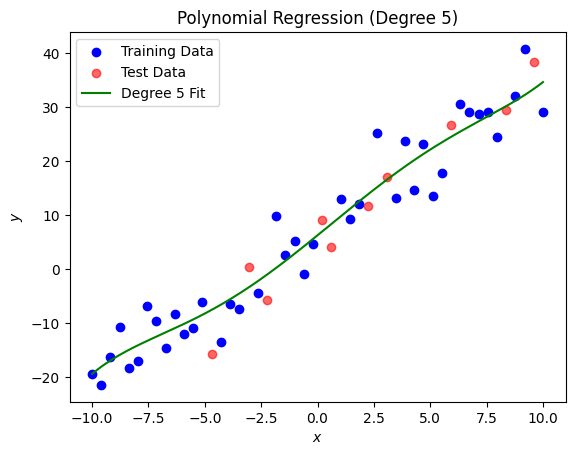

Degree 6: Train RMSE = 4.26, Test RMSE = 4.15


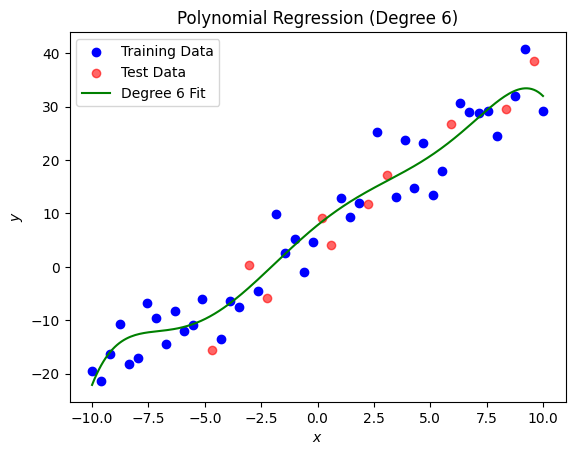

Degree 7: Train RMSE = 4.20, Test RMSE = 4.39


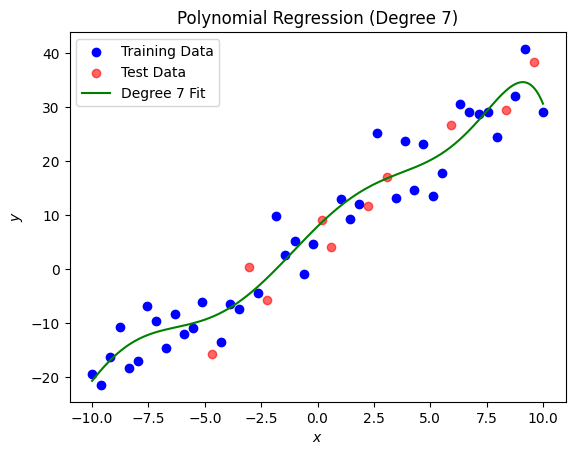

Degree 8: Train RMSE = 4.20, Test RMSE = 4.39


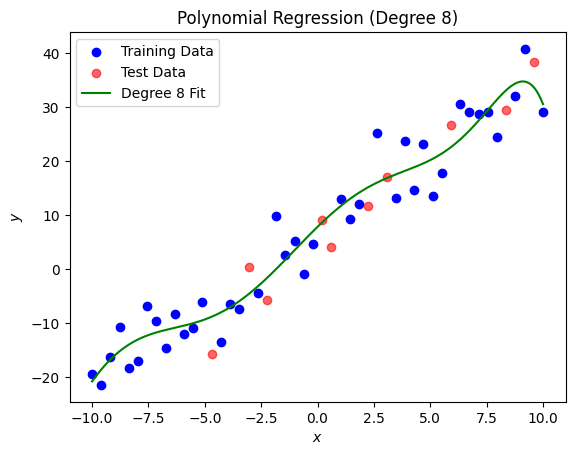

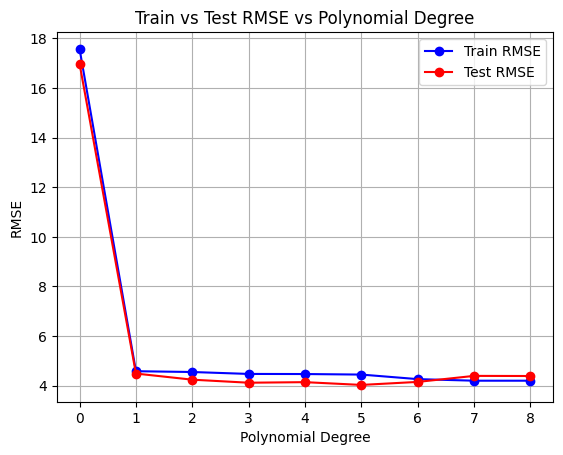

In [11]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = range(0, 9)
train_rms_errors = []
test_rms_errors = []

for d in degrees:
  # Train the model on the training set
  w_poly = polynomial_regression(X_train, y_train, d)

  # Compute predictions for the training set
  x_train_poly = polynomial_features(X_train, d)
  y_train_pred = x_train_poly.dot(w_poly)

  # Compute predictions for the test set
  x_test_poly = polynomial_features(X_test, d)
  y_test_pred = x_test_poly.dot(w_poly)

  # Calculate RSME for both training and test sets
  train_rms_error = compute_rms_error(y_train, y_train_pred)
  test_rms_error = compute_rms_error(y_test, y_test_pred)

  # Store the errors
  train_rms_errors.append(train_rms_error)
  test_rms_errors.append(test_rms_error)

  # Print the RMSE for the current degree
  print(f"Degree {d}: Train RMSE = {train_rms_error:.2f}, Test RMSE = {test_rms_error:.2f}")

  # Plot the polynomial fit on the training data
  plt.scatter(X_train, y_train, color='blue', label="Training Data")
  plt.scatter(X_test, y_test, color='red', label="Test Data", alpha=0.6)
  X_fit = np.linspace(X.min(), X.max(), 200)
  X_fit_poly = polynomial_features(X_fit, d)
  y_fit_pred = X_fit_poly.dot(w_poly)
  plt.plot(X_fit, y_fit_pred, color='green', label=f'Degree {d} Fit')
  plt.title(f"Polynomial Regression (Degree {d})")
  plt.xlabel("$x$")
  plt.ylabel("$y$")
  plt.legend()
  plt.show()

# Plot RMSE for training and test sets
plt.plot(degrees, train_rms_errors, marker='o', linestyle='-', color='blue', label='Train RMSE')
plt.plot(degrees, test_rms_errors, marker='o', linestyle='-', color='red', label='Test RMSE')
plt.title("Train vs Test RMSE vs Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.xticks(degrees)
plt.grid(True)
plt.legend()
plt.show()

As you can see from the RMSE plot above, by increasing the degree polynomial, the training error never increases.
However, testing error can increase.

## Gradient Descent:
In this section, we will use the popular iterative method called **Gradient Descent** to solve the regression problem.

Assuming we need to find $ w_0\ and\ w_1 $ in the problem of linear regression, update rule using gradinet descent will be:
$$
\begin{array}{l}
w_0 \leftarrow w_0 - \eta \frac{\partial J}{\partial w_0} = w_0 - \eta \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)}) \\
w_1 \leftarrow w_1 - \eta \frac{\partial J}{\partial w_1} = w_1 - \eta \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)}) (x^{(i)}) \\
\end{array}
$$

In which $ \eta $ is the learning rate. To overcome the problem of overflow, assume cost function is $ J(\mathbf{w}) = \frac{SSE}{training \ \ size} $

### Implementing GD for linear regression

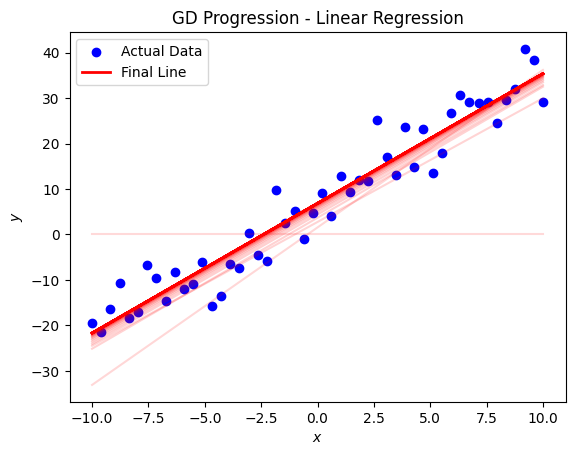

In [12]:
# SSE cost function
def cost_function(X, y, w):
  return np.sum((h_x(X, w) - y)**2) / len(X)

# Gradient descent
def gradient_descent(X, y, w, alpha, num_iters):
  m = len(X)
  cost_history = []
  w_history = [w.copy()]

  for i in range(num_iters):
    #updates
    gradient_w0 = np.sum(h_x(X, w) - y) / m
    gradient_w1 = np.sum((h_x(X, w) - y) * X) / m
    w[0] -= alpha * gradient_w0
    w[1] -= alpha * gradient_w1

    cost_history.append(cost_function(X, y, w))
    w_history.append(w.copy())

  return w, cost_history, w_history

X, y = generate_data(n=50, noise=5.0)
w_initial = [0, 0]
eta = 0.05
num_iters = 500

# Run gradient descent
w_final, cost_history, w_history = gradient_descent(X, y, w_initial, eta, num_iters)

# Visualize cost function (log of J(w))
w0_vals = np.linspace(-10, 20, 100)
w1_vals = np.linspace(-1, 5, 100)
J_vals = np.zeros((len(w0_vals), len(w1_vals)))

for i in range(len(w0_vals)):
  for j in range(len(w1_vals)):
    w = [w0_vals[i], w1_vals[j]]
    J_vals[i, j] = cost_function(X, y, w)

# Plot GD Progression (without labels for lines, different alphas)
plt.scatter(X, y, color='blue', label='Actual Data')

# Plot lines for every 50th step with increasing alpha
for idx, w in enumerate(w_history[::num_iters // 100]):
  alpha = 0.15 + + 0.85*(idx) / 100
  plt.plot(X, h_x(X, w), color='red', alpha=alpha)

# Final line in bold
plt.plot(X, h_x(X, w_final), color='red', lw=2, label="Final Line")

plt.title("GD Progression - Linear Regression")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()



# **Plotting cost function**

To get a better sense of SSE cost function, let's visualize it for univariate linear regression discussed:

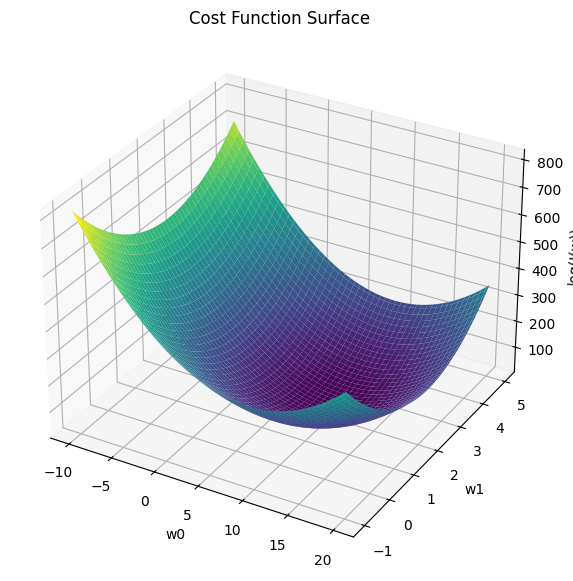

In [13]:
# 3D Plot of J(w)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
W0, W1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(W0, W1, J_vals, cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('log(J(w))')
plt.title('Cost Function Surface')
plt.show()

the plot above can be somewhat confusing. Let us visualize ***logJ(w)*** instead:

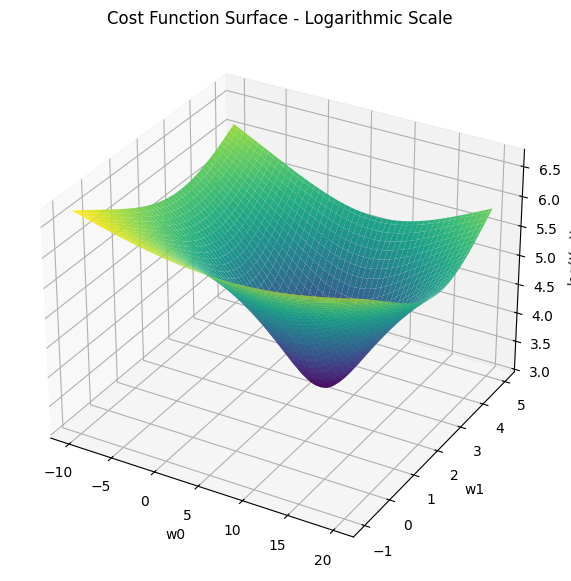

In [14]:
# 3D plot of log J(w)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
W0, W1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(W0, W1, np.log(J_vals.T), cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('log(J(w))')
plt.title("Cost Function Surface - Logarithmic Scale")
plt.show()

Gradient descent tries to reach minimum point of the plot above in each step. But are we actually reaching our goal? Let's visualize it:

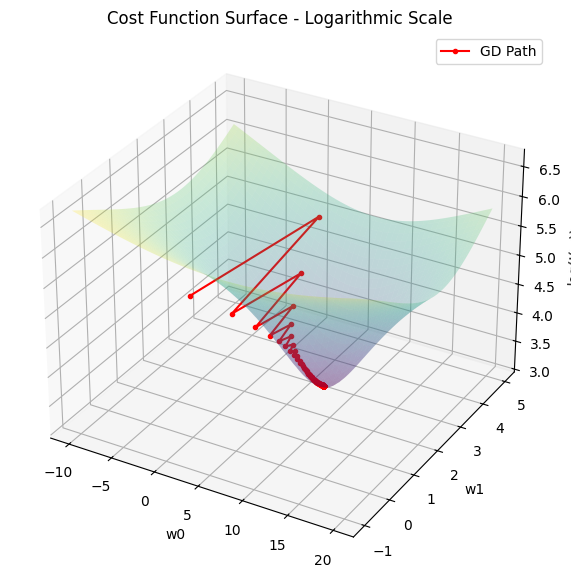

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
W0, W1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(W0, W1, np.log(J_vals.T), cmap='viridis', alpha=0.25)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('log(J(w))')
plt.title("Cost Function Surface - Logarithmic Scale")

# Plot the points on the 3D surface for each GD iteration
w_history_array = np.array(w_history)
w0_history = w_history_array[:, 0]
w1_history = w_history_array[:, 1]
cost_history_log = np.log(np.array(cost_history))

# Plot the path of gradient descent in 3D
ax.plot(
    w0_history[:num_iters], w1_history[:num_iters],
    cost_history_log, marker='o', color='r',
    label='GD Path', markersize=3)

plt.legend()
plt.show()

As shown in the plot above, GD is trying to reach optimal point at each step.

# **Effect of learning rate**

Choosing the learning rate could be tricky. Large learning rate can lead to divergence. Small learning rates on the other hand could slow doown the convergence by requiring more iterations:

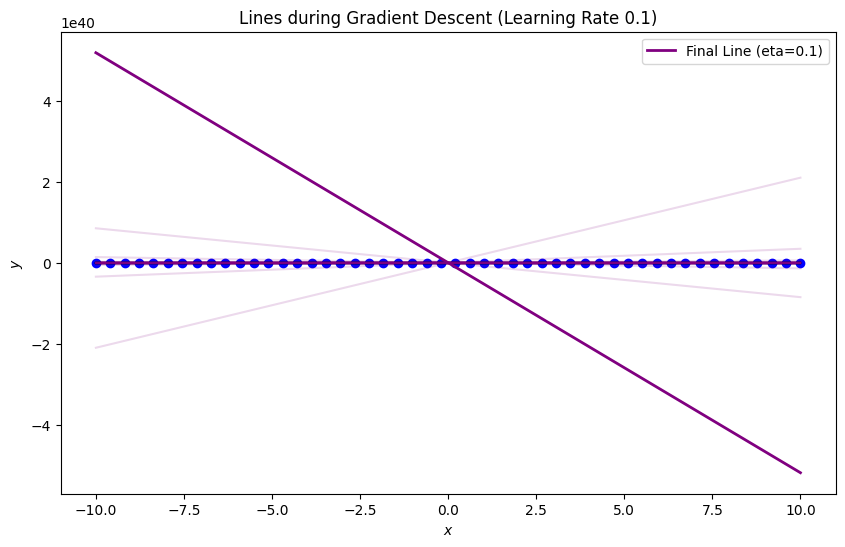

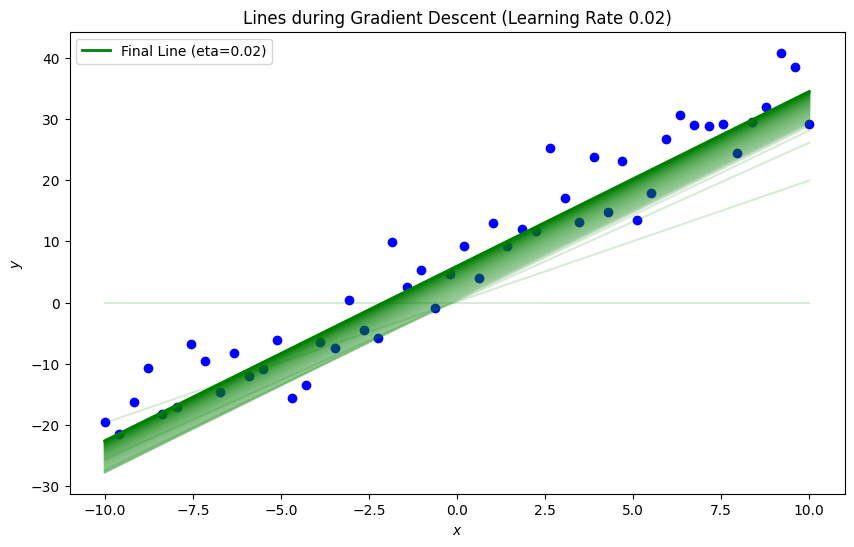

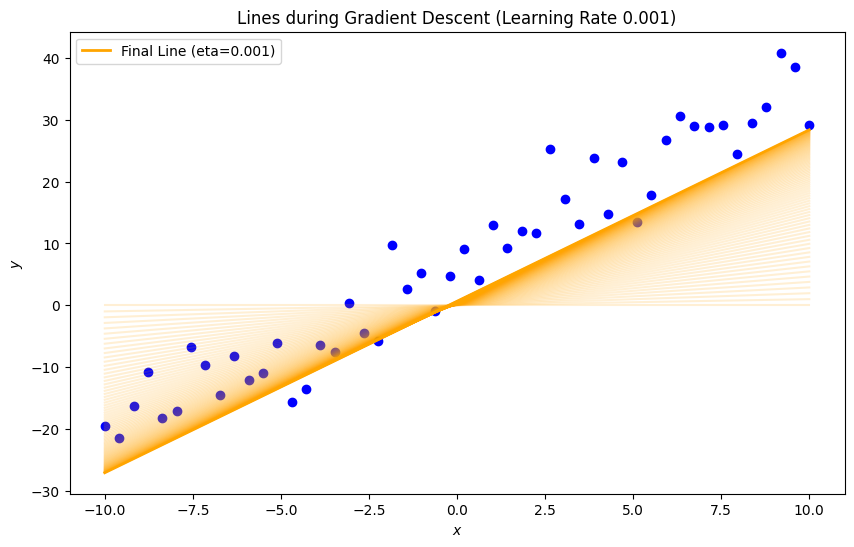

In [16]:
learning_rates = [0.1, 0.02, 0.001]
num_iters = 100
w_initial = [0, 0]

colors = ['purple', 'green', 'orange']

w0_vals = np.linspace(-10, 20, 100)
w1_vals = np.linspace(-1, 5, 100)
J_vals = np.zeros((len(w0_vals), len(w1_vals)))

for i in range(len(w0_vals)):
  for j in range(len(w1_vals)):
    w = [w0_vals[i], w1_vals[j]]
    J_vals[i, j] = cost_function(X, y, w)

cost_histories = []

# GD for each eta
for idx, eta in enumerate(learning_rates):
  w_final, cost_history, w_history = gradient_descent(X, y, w_initial.copy(), eta, num_iters)
  cost_histories.append(cost_history)

  # Plot GD
  plt.figure(figsize=(10,6))
  for step_idx, w in enumerate(w_history[::num_iters // 100]):
    alpha_val = 0.15 + 0.85*(idx) / 100
    plt.plot(X, h_x(X, w), color=colors[idx], alpha=alpha_val)

  plt.plot(X, h_x(X, w_final), lw=2, color=colors[idx], label=f"Final Line (eta={eta})")
  plt.title(f"Lines during Gradient Descent (Learning Rate {eta})")
  plt.xlabel("$x$")
  plt.ylabel("$y$")
  plt.legend()
  plt.scatter(X, y, color='blue', label='Actual Data')
  plt.show()

As shown in the plot above, choosing a large learning rate leads to divergence. In this example the update rule keeps making weights larger and larger and the weights will never converge. Choosing a small learning rate on the other hand, leads to slow convergence. In this example learning rate w0 is happening at a slow time because the update rule is being changed most minimally!

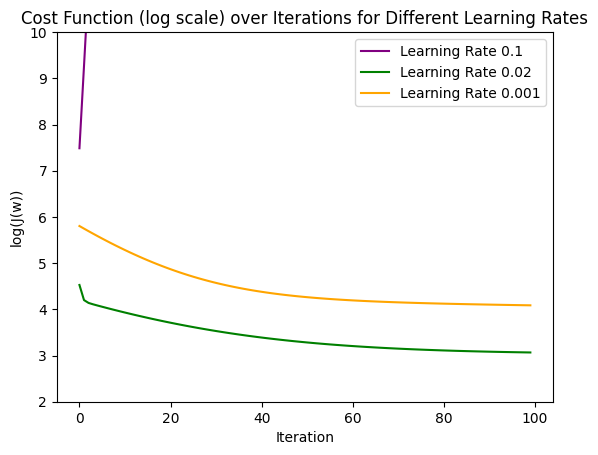

In [18]:
plt.title("Cost Function (log scale) over Iterations for Different Learning Rates")
plt.xlabel("Iteration")
plt.ylabel("log(J(w))")
for idx in range(len(cost_histories)):
  plt.plot(np.log(cost_histories[idx]), label=f"Learning Rate {learning_rates[idx]}", color=colors[idx])
plt.ylim(bottom=2, top=10)
plt.legend()
plt.show()